# Extract Data from Bayesian Inference

In [3]:
from Manuel_BayesTRPL_Utilities import *
from Manuel_BayesTRPL_Plotting_Paper import *

In [4]:
folder = r"C:\Users\kober-czerny\OneDrive - Nexus365\00_Oxford_PhD\00_Snaith Group\Projects_Collection\MKC06_Bayes\5_Data Collection\TRPL\2023_07_20_Bayes_Seongrok_FAPI"
trace_file = r"Seo_FAPI_trace_2024-06-19_111815.nc"

# enter names for the two sides for nicer looking labels
side_1 = 'bot'
side_2 = 'top'

df, pile_up, sample_names, Fluences, Thickness, Surface, Absorption_coeff, Reflectance, intensity, max_arg, one_sun_carrier_density, spacing, reabs_option = Bayes_TRPL_Utils(folder, trace_file)

Files ready...


# Standard Plot

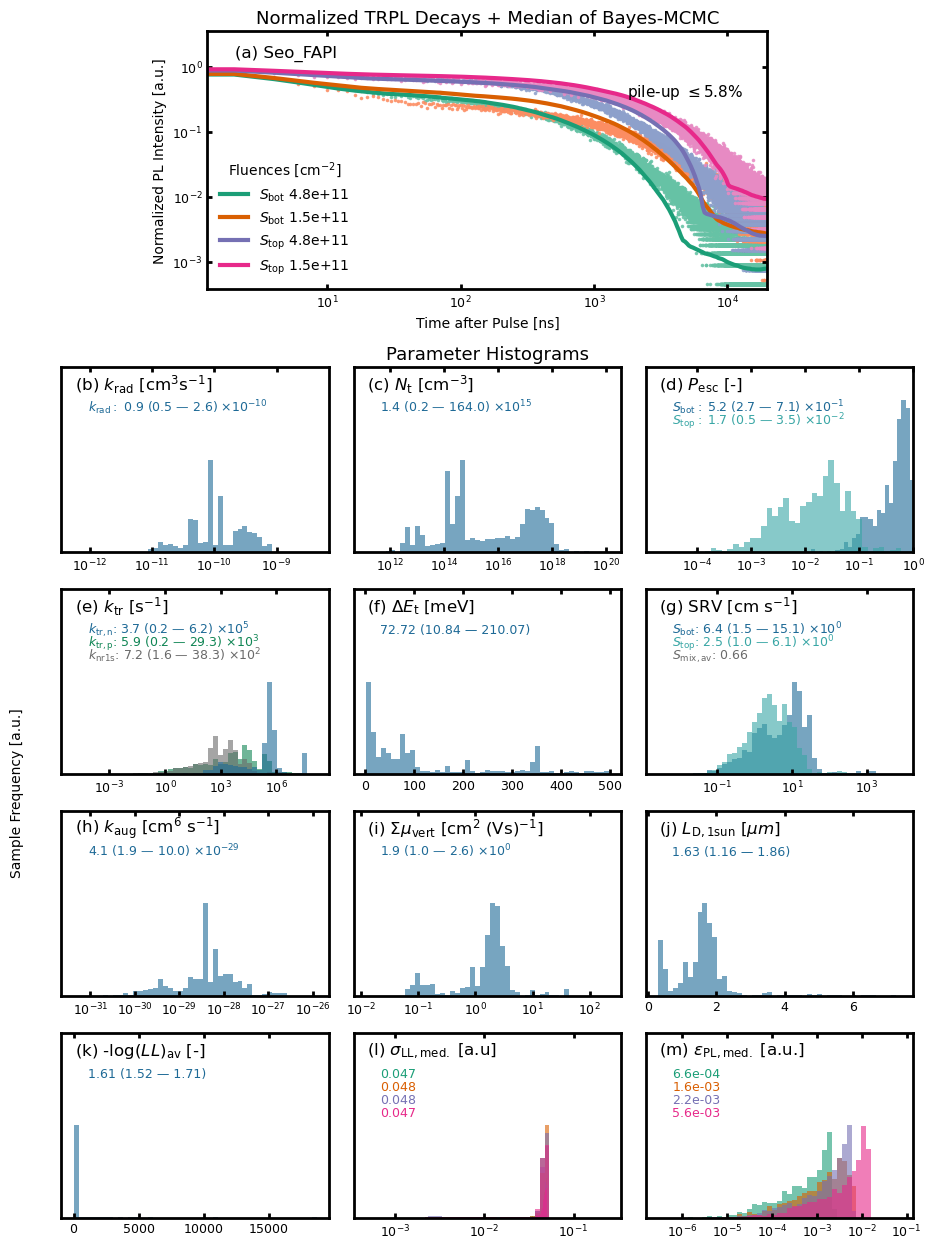

In [5]:
scaling = 'log'
df_save, test_trace = make_BayesFigure(trace_file, folder, df,  Fluences, Surface, spacing, reabs_option, max_arg, Thickness, scaling, one_sun_carrier_density, pile_up, side_1, side_2)

In [19]:
print(str("1 sun estimate: " + '{:.2e}'.format(one_sun_carrier_density) + " cm^-3"))

1 sun estimate: 2.46e+15 cm^-3


In [209]:
n0 = np.array([1.08540620e+15, 8.40121106e+14, 8.00968467e+15, 5.10579470e+15])
p0 = np.array([7.39039030e+15, 4.73512897e+15, 3.69042464e+16, 2.25185604e+16])
print(p0-n0)

[6.30498410e+15 3.89500786e+15 2.88945617e+16 1.74127657e+16]


In [10]:
#D = df_save['Mobility']*(1.380649e-23*292/1.6021766e-19)
#test_parameter = 1/(2*D*np.pi**2/(600e-7**2))*1e9

test_parameter = df_save['LL_av']

print(np.median(test_parameter))
print(np.quantile(test_parameter,0.25))
print(np.quantile(test_parameter,0.75))
print(np.log10(np.median(test_parameter)))

1.8184922312447267
1.7982733602434278
1.8640780262187655
0.2597114500513008


In [4]:
test_trace.sample_stats.accept

Inference data with groups:
	> posterior
	> sample_stats

inf


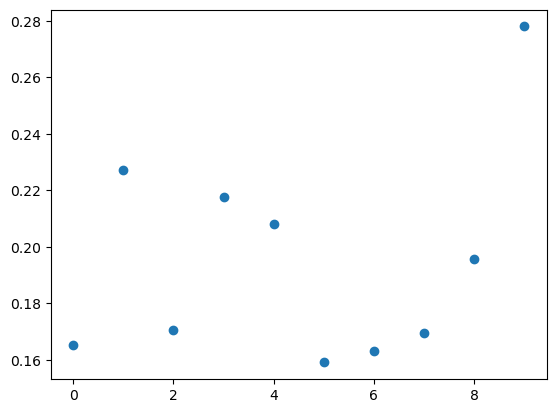

In [10]:
print(test_trace.sample_stats.accept.values[0,1,0])

array = test_trace.sample_stats.accepted.values[:,-1000:,:]



plt.scatter(np.arange(np.shape(array)[0]), np.mean(array, axis=(1,2)).T)
#plt.ylim(0,1)

# 2D Cornerplots

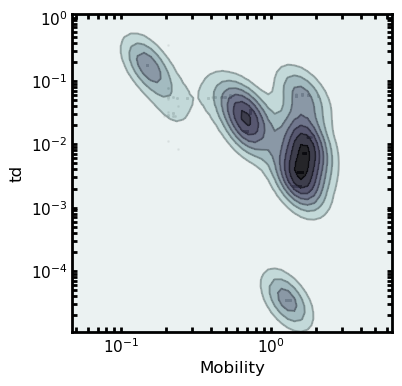

In [30]:
A_test = 'Mobility'
B_test = 'td'

corner_plot_single(df_save[A_test], df_save[B_test], A_test, B_test, ' ')


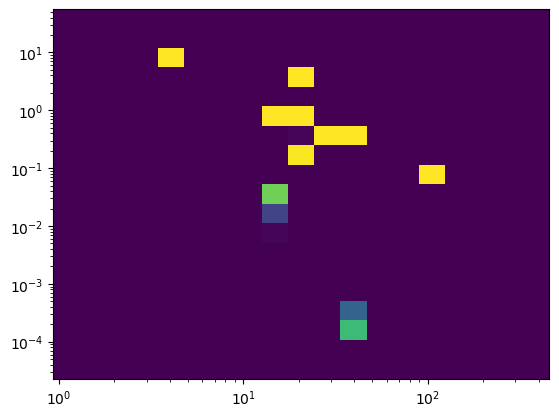

In [18]:
x = df_save['S_1']
y = df_save['S_2']

bins_x = np.logspace(np.log10(x.min()/5),np.log10(x.max()*5),20)
bins_y = np.logspace(np.log10(y.min()/5),np.log10(y.max()*5),20)

plt.hist2d(x, y, bins=[bins_x,bins_y])

plt.xscale('log')
plt.yscale('log')
plt.show()

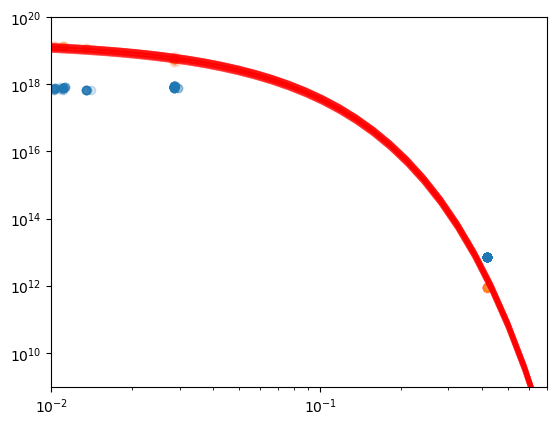

In [16]:
import random


A_test = 'td'
B_test = 'N_t(cm-3)'

#corner_plot_single(df_save[A_test], df_save[B_test], A_test, B_test, ' ')

#Nt = np.logspace(15,20,10,base=10)
plt.scatter(df_save[A_test], df_save[B_test], alpha=0.1)

td = np.logspace(-6,0.2,100,base=10)

for i in np.arange(100):
    rand_pick = random.randint(0,len(df_save['Mobility'])-1)
    mu = df_save['Mobility'][rand_pick]

    Nt = 1e18*(27/mu -1)*np.exp(-td/(8.6e-5*300))
    #td = np.log10(Nt/1e18)

    #plt.plot(Nt, td)
    #mu_calc = 27/(1e19/1e18*np.exp(td/(8.6e-5*292))+1)

    plt.plot(td, Nt, c='red', alpha=0.05, linewidth=3)

plt.scatter(df_save[A_test], 1e18 * (27/df_save['Mobility']-1) * np.exp(-df_save['td']/(8.61733e-5*292)), alpha=0.01)

plt.xlim(1e-2,0.7)
plt.ylim(1e9,1e20)
plt.xscale('log')
plt.yscale('log')

In [63]:
N_t_shallow = 1e18 * (27/(df_save['Mobility'])-1) * np.exp(-df_save['td']/(8.61733e-5*292))

mu_D = 27/(1 + df_save['N_t(cm-3)']/1e18*np.exp(df_save['td']/(8.6e-5*292)))

print(np.median(N_t_shallow))

1.890044180571069e+18


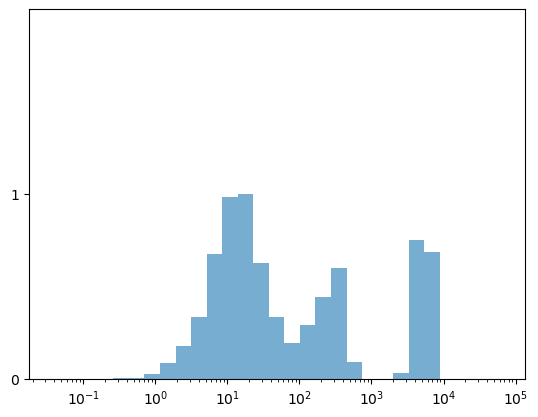

1366.0


In [62]:
test_param = df_save['k_nr1sun']


logbins = np.logspace(np.log10(test_param.min()/10), np.log10(test_param.max()*10),30)

x,y, _ = plt.hist(test_param, bins=logbins, alpha=0.6)

plt.xscale('log')
plt.ylim(bottom=0, top=2*x.max())
plt.yticks([0,x.max()], labels=[0,1])
plt.show()
print(x.max())

In [15]:
A_test = "k_trapping(s-1)"
B_test = "k_trapping1(s-1)"



#corner_plot_single(df_save[A_test], df_save[B_test], A_test, B_test, ' ')

A = df_save[A_test].ravel()
B = df_save[B_test].ravel()

A = A[np.where(B != 0)]
B = B[np.where(B != 0)]
A = A[np.where(A != 0)]
B = B[np.where(A != 0)]

corner_plot_single(A, B, A_test, B_test, ' ')


KeyError: 'S_2'

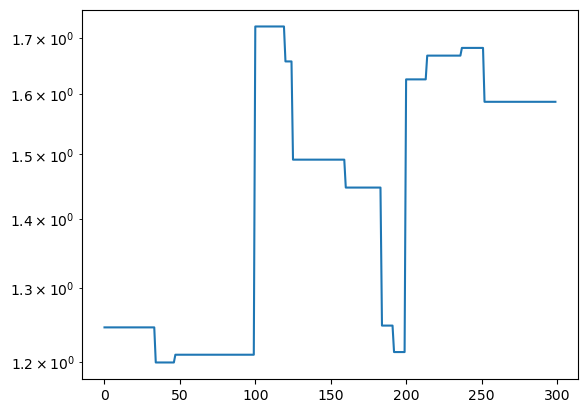

In [18]:
plt.semilogy(np.arange(len(df_save['Mobility'])),df_save['Mobility'])

In [18]:
print(np.mean(df_save['sigma_L']))

0.046997602782795835


In [190]:
print('{:.2e}'.format(np.mean(df_save['S_1'])))
print('{:.2e}'.format(np.std(df_save['S_1'])))

2.17e+00
6.16e+00


In [191]:
k1 = 2e6
ne_1 = 1e20

print(k1*1/(2*1e17+ne_1))

1.9960079840319362e-14


In [24]:
prod = df_save['S_1'] * df_save['S_2']
sum = df_save['S_1'] + df_save['S_2']

diff = df_save['S_1'] / df_save['S_2']

b_factor = prod/((sum/2)**2)

print(np.mean(prod))

2.498533623745121


In [99]:
print(np.sqrt(1e36 * np.exp(-1.55/(8.6e-5*300))))

90018.63504819825


In [70]:
G = np.min(Fluences)/600e-7 * 50000

print(G)

1.2700566666666667e+20


In [71]:

from scipy.optimize import root

ne_1 = 1e18 * np.exp(-df_save['td']/(8.6e-5 * 292))

Diff = df_save['Mobility']*(1.380649e-23*292/1.6021766e-19)*np.pi**2/(600e-7**2)

def rate_equations(vars, Gen, kc_n, ne_1, krad,  S_sum, Diff):            
        ### Pseudo-Equilibrium at each time-point
        n_dens = vars
        
        dn_dt = Gen - (krad)*(n_dens**2) - (kc_n*5)*(n_dens**2)/(6*n_dens + ne_1)  - (S_sum)/(600e-7)*n_dens- 1e-28*n_dens**3
        
        return dn_dt

vals = []

for i in np.arange(100):

    vars_ss = root(rate_equations, 1e12, method='hybr', args=(G, df_save['k_trapping'][i], ne_1[i], df_save['k_rad'][i], df_save['S_1'][i] + df_save['S_2'][i], Diff[i]))
    
    ratio = vars_ss.x/(vars_ss.x + ne_1[i])

    N_t = df_save['n_eq'][i]/ratio
    
    vals.append(vars_ss.x)


In [72]:
test_parameter = vals

print('{:.2e}'.format(np.median(test_parameter)))
print(np.quantile(test_parameter,0.25))
print(np.quantile(test_parameter,0.75))

2.75e+14
189013608600282.9
351897738801247.75


In [5]:
ratio = np.median(test_parameter)/(2*np.median(test_parameter) + ne_1[10])



print(5e15/ratio)

NameError: name 'test_parameter' is not defined

In [13]:
# steady-state trap density

N_t = 8e16
n_0 = 1.1e11/600e-7
freq_t = 1/(50000)*1e9

n_ts_list = []

for i in np.arange(1000):
    tau_c = 1/df_save['k_trapping'][i]*1e9
    tau_e = 1/(1e18*np.exp(-df_save['td'][i]/(8.6e-5*300)) * df_save['k_trapping'][i]/N_t) *1e9
    tau_n = 1/(df_save['k_rad'][i]*n_0) *1e9

    lambda1 = 1/tau_n + 1/tau_c + 1/tau_e *(1 - tau_c/tau_n)
    lambda2 = tau_c/(tau_e*tau_n)

    n_ts = n_0 * tau_e/tau_c * (np.exp(freq_t*lambda1) - np.exp(freq_t*lambda2))/((1-tau_e*lambda1)*np.exp(freq_t*lambda1) + tau_e*(lambda1-lambda2)*np.exp(freq_t*(lambda1+lambda2))-(1-tau_e*lambda2)*np.exp(freq_t*lambda2))


    #ratio = 

    n_ts_list.append(n_ts)


print(tau_n)
n_ts = np.median(n_ts_list)

print('{:.2e}'.format(n_ts))


735.2553034892076
5.44e+13


In [92]:
S_only = df_save['S_2'].values + df_save['k_nr1sun']*600e-7



print(np.quantile(S_only,0.75))

551.8790175687601


[  8058.51240569  53689.327576   105461.17916714 157616.52595525
 209771.87274336 262066.47593573 314466.06151656 366621.40830467]
26179.93877991494


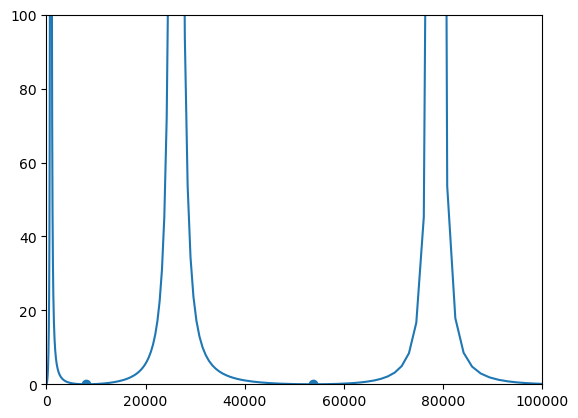

In [32]:
from scipy.optimize import shgo

def f(x, D, a, b, thickness):
        #return (np.tan(x*thickness)+(D*(a)*x)/(b-D**2*x**2))**2
        return (np.tan(x*thickness)+(D*(a)*x)/((a/2)**2*b-D**2*x**2))**2


thickness = 600e-7

D_list = np.logspace(0, 3, 10)*0.025
a_list = np.logspace(0,5,10)
b_list = np.logspace(-5,0,10)

beta_0_matrix = np.zeros(shape=(len(D_list),len(a_list),len(b_list)))

D = 0.025*0.2
S1 = 20
S2 = 1

a = S1+S2
prod = S1*S2
b = prod/((a/2)**2)

betas1 = np.sort(shgo(f,bounds=[(0,0.8*np.pi/(thickness))], args = (D, a, b, thickness), sampling_method='sobol', n=1000).xl.flatten())
betas2 = np.sort(shgo(f,bounds=[(0,(8-0.5)*np.pi/(thickness))], args = (D, a, b, thickness), sampling_method='sobol', n=800).xl.flatten())


betas1 = np.delete(betas1, np.where(betas1 == 0.8*np.pi/(thickness)))


if np.abs(betas1[-1]-betas2[1])/betas1[-1] < 10:
    betas = np.append(betas1[1:], betas2[2:])
else:
    betas = np.append(betas1[1:], betas2[1:])



#betas = np.append(betas1[1:],betas2[1:])


x = np.logspace(-3,5.7,1000)


plt.plot(x, (np.tan(x*thickness)+(D*(a)*x)/((a/2)**2*b-D**2*x**2))**2)
plt.scatter(betas, np.zeros(np.shape(betas)))
plt.ylim(0,100)
plt.xlim(0,1e5)

print(betas)
print(0.5*np.pi/(thickness))

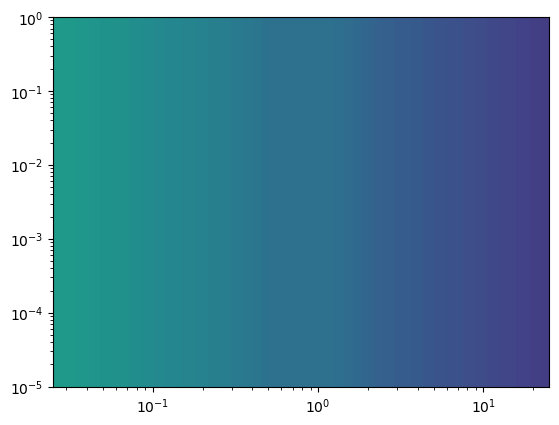

In [124]:
plt.contourf(D_list, b_list, np.log10(beta_0_matrix[:,0,:].T), levels=np.linspace(-4,0,100))

plt.xscale('log')
plt.yscale('log')


In [53]:
(np.pi/thickness)

52359.87755982988

In [4]:
n_dens = 1e15
p_dens = 1e16
kc_n = 1e6
kc_p = 0
N_t = 1e18
td = 0.1

ne1 = 1e18*np.exp(-0.1/(8.5e-6*300))


ft1 = n_dens/(n_dens + kc_p/kc_n*p_dens+ne1)

ft2 = (p_dens-n_dens)/N_t

print(ft1, ft2)


0.9999999999999908 0.009
